In [26]:
import pandas as pd 
import numpy as np 

In [27]:
data = pd.read_excel("finalorg134.xlsx")

In [28]:
data.shape
## Reading rename dictionary (in-house)
dictionary = pd.read_excel('org134-2.17 variable naming updates.xlsx',sheet_name='Sheet4')

In [29]:
combined = {} 

In [30]:

updated = dictionary['UPDATED 2/17/24'].unique()
for u in updated:
    if u in combined.keys():
        combined[u].extend(list(dictionary[dictionary['UPDATED 2/17/24']==u]['Variable Name']))
    else:
        combined[u] = list(dictionary[dictionary['UPDATED 2/17/24']==u]['Variable Name']) 

In [31]:
for key in combined.keys():
    combined[key] = list(set(combined[key]))

In [32]:
combined.keys()

dict_keys(['Collaborative Work Enivornmental Preferences', 'Current Focused Work ', 'Department', 'Focused Work Environmental Preferences', 'Office Satisfaction', 'Organization', 'Pre Covid In Person Collab Work (1-3 people)', 'Pre Covid In Person Collab Work (4-10+ people)', 'Pre-Covid Hybrid Meetings', 'Pre-Covid In Person Meetings', 'Pre-Covid Remote Meetings', 'Future Workplace Features Preference', 'Environment Productivity Impact', 'Workplace Tech Features Importance', 'Workplace Preference', 'Office Workspace Preference'])

In [33]:
data.dtypes

Unnamed: 0.1                               int64
OBSV_PreC_wiOffice_B_otherdeck           float64
PREF_features_C_concentration              int64
PREF_space_D_impromptu                   float64
PREF_Envr_Focus_1E_light                 float64
PREF_features_E_noise                    float64
PREF_features_R_gym                        int64
SATSF_CollabSpace_C_CollabTools          float64
PostC_impact_shift_B_productive          float64
OBSV_PreC_Location_G_other               float64
PREF_Envr_Focus_1A_activity              float64
PREF_space_F_accessible                  float64
OBSV_PreC_wiOffice_E_speicaltyarea       float64
DEMO_Dept                                 object
PREF_Envr_Focus_1H_energy                float64
PREF_Envr_Collab_2H_energy               float64
PREF_Envr_Collab_2C_remote               float64
PREF_features_S_relax                      int64
OBSV_PreC_meeting_A_inperson             float64
SATSF_CollabSpace_A_Tech                 float64
PREF_features_A_chai

In [34]:
for key in combined.keys():
    if key != 'Department' and key != 'Organization':
        for column in combined[key]:
            if column in data.columns:
                data[column].fillna(data[column].mean(),inplace=True) 

In [35]:
data.isna().sum()

Unnamed: 0.1                             0
OBSV_PreC_wiOffice_B_otherdeck           0
PREF_features_C_concentration            0
PREF_space_D_impromptu                   0
PREF_Envr_Focus_1E_light                 0
PREF_features_E_noise                    0
PREF_features_R_gym                      0
SATSF_CollabSpace_C_CollabTools          0
PostC_impact_shift_B_productive          0
OBSV_PreC_Location_G_other               0
PREF_Envr_Focus_1A_activity              0
PREF_space_F_accessible                  0
OBSV_PreC_wiOffice_E_speicaltyarea       0
DEMO_Dept                                0
PREF_Envr_Focus_1H_energy                0
PREF_Envr_Collab_2H_energy               0
PREF_Envr_Collab_2C_remote               0
PREF_features_S_relax                    0
OBSV_PreC_meeting_A_inperson             0
SATSF_CollabSpace_A_Tech                 0
PREF_features_A_chair                    0
OBSV_PreC_meeting_B_hyrbid               0
OBSV_same_space_count_D_10p              0
OBSV_PreC_w

In [36]:
for key in combined.keys():
    if key != 'Department' and key != 'Organization' and len(combined[key]) > 0:
          data[key] = data[combined[key]].mean(axis=1) 

In [37]:
for key in combined.keys():
    if key != 'Department' and key != 'Organization' and len(combined[key]) > 0:
        s = 0 
        for column in combined[key]:
            if column in data.columns: 
                data.drop(column,axis=1,inplace=True)

In [38]:
data.head()

,Unnamed: 0.1,OBSV_PreC_Location_G_other,DEMO_Dept,OBSV_same_space_count_D_10p,DEMO_Org,OBSV_PreC_meetingsize0ffice_D_10plus,OBSV_Now_Interact_Work_within_org,OBSV_PreC_interative_B_remote,Unnamed: 0,Collaborative Work Enivornmental Preferences,Current Focused Work,Focused Work Environmental Preferences,Office Satisfaction,Pre Covid In Person Collab Work (1-3 people),Pre Covid In Person Collab Work (4-10+ people),Pre-Covid Hybrid Meetings,Pre-Covid In Person Meetings,Pre-Covid Remote Meetings,Future Workplace Features Preference,Environment Productivity Impact,Workplace Tech Features Importance,Workplace Preference,Office Workspace Preference
0,4,1.0,Accounting,1.0,Org 3,0.0,0.0,1.0,4,7.714286,1.0,7.571429,5.0,0.500000,0.000000,1.0,0.0,0.0,2.384615,2.000000,4.5,0.000000,0.166667
1,5,1.0,Accounting,1.0,Org 3,0.2,0.0,1.0,5,4.857143,1.0,1.571429,5.0,0.300000,0.200000,0.3,0.6,0.1,2.076923,3.333333,5.0,0.428571,0.166667
2,8,1.0,Accounting,1.0,Org 3,0.0,0.0,1.0,8,6.285714,1.0,0.866196,4.0,0.150000,0.700000,0.8,0.2,0.0,2.461538,2.500000,2.5,0.571429,0.166667
3,9,1.0,Accounting,1.0,Org 3,0.0,0.0,1.0,9,5.000000,1.0,4.428571,4.5,0.315789,0.368421,0.2,0.7,0.1,2.538462,3.500000,4.0,0.285714,0.166667
4,10,1.0,Accounting,1.0,Org 3,0.0,0.0,1.0,10,1.000000,1.0,1.571429,4.0,0.000000,1.000000,0.5,0.5,0.0,1.615385,1.666667,2.0,0.714286,0.166667


In [39]:
data.columns


Index(['Unnamed: 0.1', 'OBSV_PreC_Location_G_other', 'DEMO_Dept',
       'OBSV_same_space_count_D_10p', 'DEMO_Org',
       'OBSV_PreC_meetingsize0ffice_D_10plus',
       'OBSV_Now_Interact_Work_within_org', 'OBSV_PreC_interative_B_remote',
       'Unnamed: 0', 'Collaborative Work Enivornmental Preferences',
       'Current Focused Work ', 'Focused Work Environmental Preferences',
       'Office Satisfaction', 'Pre Covid In Person Collab Work (1-3 people)',
       'Pre Covid In Person Collab Work (4-10+ people)',
       'Pre-Covid Hybrid Meetings', 'Pre-Covid In Person Meetings',
       'Pre-Covid Remote Meetings', 'Future Workplace Features Preference',
       'Environment Productivity Impact', 'Workplace Tech Features Importance',
       'Workplace Preference', 'Office Workspace Preference'],
      dtype='object')

In [40]:
data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [41]:
data.head()
pd.set_option('display.max_columns', None) 

pd.set_option('display.max_rows', None)

In [42]:
data.describe()

,OBSV_PreC_Location_G_other,OBSV_same_space_count_D_10p,OBSV_PreC_meetingsize0ffice_D_10plus,OBSV_Now_Interact_Work_within_org,OBSV_PreC_interative_B_remote,Collaborative Work Enivornmental Preferences,Current Focused Work,Focused Work Environmental Preferences,Office Satisfaction,Pre Covid In Person Collab Work (1-3 people),Pre Covid In Person Collab Work (4-10+ people),Pre-Covid Hybrid Meetings,Pre-Covid In Person Meetings,Pre-Covid Remote Meetings,Future Workplace Features Preference,Environment Productivity Impact,Workplace Tech Features Importance,Workplace Preference,Office Workspace Preference
count,7.130000e+02,713.000000,7.130000e+02,710.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,6.719201e-01,0.709583,2.044420e-01,0.150168,0.872959,5.349022,0.850464,4.084951,4.122003,0.299598,0.358968,0.358924,0.471964,0.285646,2.202516,2.471004,4.334274,0.378400,0.187607
std,4.689308e-01,0.425132,3.743517e-01,0.250350,0.283200,1.503380,0.250011,1.498473,0.801330,0.142853,0.279363,0.270730,0.297459,0.364623,0.296570,1.166024,0.766923,0.247294,0.053123
min,-2.220446e-16,0.000000,-2.220446e-16,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.166667
25%,0.000000e+00,0.150000,0.000000e+00,0.000000,1.000000,4.482344,0.750000,3.142857,4.000000,0.222222,0.117647,0.150000,0.200000,0.000000,1.939957,1.666667,4.000000,0.142857,0.166667
50%,1.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,5.428571,1.000000,4.084951,4.000000,0.299598,0.358968,0.350000,0.471964,0.100000,2.164325,2.500000,4.500000,0.285714,0.166667
75%,1.000000e+00,1.000000,1.500000e-01,0.250000,1.000000,6.285714,1.000000,5.000000,5.000000,0.400000,0.500000,0.500000,0.700000,0.400000,2.384615,3.333333,5.000000,0.571429,0.166667
max,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,10.000000,1.000000,10.000000,5.000000,0.500000,1.000000,1.000000,1.000000,1.000000,2.846154,5.000000,5.000000,1.000000,0.322189


In [43]:
combined['Home Satisfaction']

KeyError: 'Home Satisfaction'

In [44]:
data.describe().to_excel("descriptive.xlsx")

In [45]:
## data variable contains final data
data.to_excel("org134-composite.xlsx")

In [46]:
data.columns

Index(['OBSV_PreC_Location_G_other', 'DEMO_Dept',
       'OBSV_same_space_count_D_10p', 'DEMO_Org',
       'OBSV_PreC_meetingsize0ffice_D_10plus',
       'OBSV_Now_Interact_Work_within_org', 'OBSV_PreC_interative_B_remote',
       'Collaborative Work Enivornmental Preferences', 'Current Focused Work ',
       'Focused Work Environmental Preferences', 'Office Satisfaction',
       'Pre Covid In Person Collab Work (1-3 people)',
       'Pre Covid In Person Collab Work (4-10+ people)',
       'Pre-Covid Hybrid Meetings', 'Pre-Covid In Person Meetings',
       'Pre-Covid Remote Meetings', 'Future Workplace Features Preference',
       'Environment Productivity Impact', 'Workplace Tech Features Importance',
       'Workplace Preference', 'Office Workspace Preference'],
      dtype='object')

In [47]:
data['Workplace Preference']

0      0.000000
1      0.428571
2      0.571429
3      0.285714
4      0.714286
5      0.142857
6      0.285714
7      0.000000
8      0.285714
9      0.285714
10     0.714286
11     0.142857
12     0.428571
13     0.000000
14     0.285714
15     0.142857
16     0.428571
17     0.285714
18     0.428571
19     0.285714
20     0.142857
21     0.142857
22     0.142857
23     0.142857
24     0.142857
25     0.285714
26     0.428571
27     0.142857
28     0.000000
29     0.285714
30     0.571429
31     0.285714
32     0.857143
33     0.571429
34     0.571429
35     0.428571
36     0.428571
37     0.571429
38     0.142857
39     0.285714
40     0.428571
41     0.714286
42     0.142857
43     0.142857
44     0.142857
45     0.285714
46     0.142857
47     0.142857
48     0.000000
49     1.000000
50     0.285714
51     0.714286
52     0.285714
53     0.571429
54     0.285714
55     0.571429
56     0.714286
57     0.142857
58     0.428571
59     0.142857
60     0.142857
61     0.571429
62     0

In [48]:
y = data['Workplace Preference']

y.value_counts()

Workplace Preference
0.285714    172
0.142857    161
0.428571    140
0.571429     82
0.714286     49
0.000000     46
0.857143     33
1.000000     26
0.378400      4
Name: count, dtype: int64

In [49]:
from xgboost import XGBRegressor,plot_importance,plot_tree

In [50]:
xgb = XGBRegressor()

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
data.drop(['DEMO_Org'],axis=1,inplace=True)
data['DEMO_Dept'] = encoder.fit_transform(data.DEMO_Dept)
X = data.drop(['Workplace Preference'],axis=1)

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [54]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
preds = xgb.predict(X_test)

In [149]:
import matplotlib.pyplot as plt

In [56]:
preds

array([0.26539636, 0.3280457 , 0.48048067, 0.16067046, 0.3452531 ,
       0.3575311 , 0.27209252, 0.43843123, 0.24833035, 0.43972394,
       0.287571  , 0.47735557, 0.42525467, 0.51007044, 0.35577273,
       0.2282821 , 0.26150024, 0.38568196, 0.589491  , 0.28102815,
       0.1056433 , 0.5361347 , 0.48403507, 0.15782997, 0.5189673 ,
       0.65969074, 0.30235407, 0.46798962, 0.55960274, 0.49662393,
       0.03411922, 0.6744529 , 0.38732216, 0.38554338, 0.44301236,
       0.58495116, 0.44722918, 0.44171506, 0.34433123, 0.23140936,
       0.5164731 , 0.15795466, 0.4859785 , 0.39414582, 0.35885355,
       0.39505205, 0.11188417, 0.12887886, 0.4615048 , 0.26750502,
       0.19521916, 0.34575647, 0.5816837 , 0.31271037, 0.5226653 ,
       0.6056517 , 0.40703562, 0.36279187, 0.25102267, 0.59881455,
       0.3308081 , 0.43861493, 0.27353293, 0.5063819 , 0.58138794,
       0.6020792 , 0.37271243, 0.25277776, 0.43530333, 0.39217755,
       0.07928858, 0.8653765 , 0.5035487 , 0.23624526, 0.31354

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

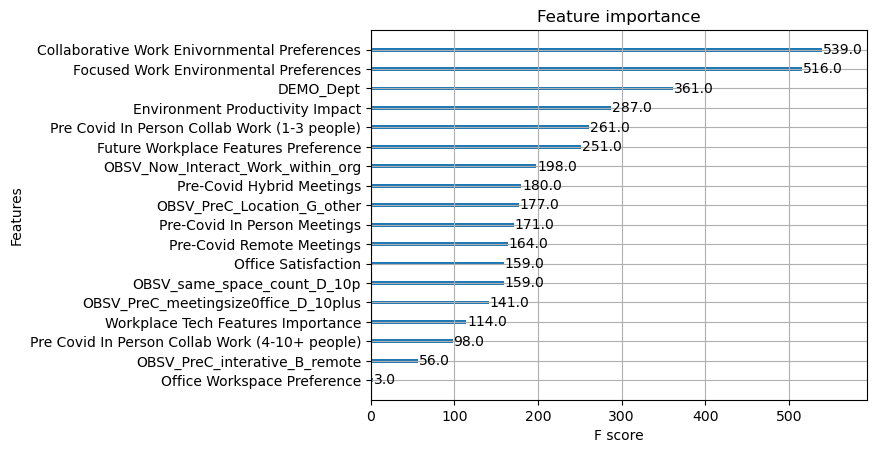

In [150]:
plot_importance(xgb)

<Axes: >

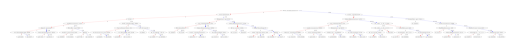

In [161]:
!pip install graphviz
plot_tree(xgb)

In [162]:
plot_tree(xgb, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(500, 500)
fig.savefig('tree.png')

In [4]:
## Reading for org 2 

new_data = pd.read_excel("final.xlsx")

In [5]:
org2 = new_data[new_data.DEMO_Org == 'Org 2']

In [7]:
pd.set_option('display.max_columns', None) 

pd.set_option('display.max_rows', None) 
org2.isna().sum()

Unnamed: 0                                         0
DEMO_Org                                           0
DEMO_meeting_remote                              130
DEMO_Dept                                          0
OBSV_PreC_Location_A_primryoffice                  0
OBSV_PreC_Location_B_officeother                   0
OBSV_PreC_Location_C_client                        0
OBSV_PreC_Location_D_WFH                           0
OBSV_PreC_Location_E_publicspace                   0
OBSV_PreC_Location_F_transit                       0
OBSV_PreC_Location_G_other                         0
OBSV_Now_Interact_Work_within_org                  0
OBSV_PreC_meeting_A_inperson                       0
OBSV_PreC_meeting_B_hyrbid                         0
OBSV_PreC_meeting_C_remote                         0
OBSV_PreC_interative_A_inperson                  130
OBSV_PreC_interative_B_remote                      0
OBSV_same_space_count_A_1                          0
OBSV_same_space_count_B_2n3                   

In [14]:
hehe = org2[org2.columns[org2.isna().sum() != org2.shape[0]]]

In [15]:
hehe.shape

(130, 73)

In [16]:
hehe.isna().sum()

Unnamed: 0                                0
DEMO_Org                                  0
DEMO_Dept                                 0
OBSV_PreC_Location_A_primryoffice         0
OBSV_PreC_Location_B_officeother          0
OBSV_PreC_Location_C_client               0
OBSV_PreC_Location_D_WFH                  0
OBSV_PreC_Location_E_publicspace          0
OBSV_PreC_Location_F_transit              0
OBSV_PreC_Location_G_other                0
OBSV_Now_Interact_Work_within_org         0
OBSV_PreC_meeting_A_inperson              0
OBSV_PreC_meeting_B_hyrbid                0
OBSV_PreC_meeting_C_remote                0
OBSV_PreC_interative_B_remote             0
OBSV_same_space_count_A_1                 0
OBSV_same_space_count_B_2n3               0
OBSV_same_space_count_C_4n9               0
OBSV_same_space_count_D_10p               0
OBSV_PreC_wiOffice_A_desk                 0
OBSV_PreC_wiOffice_B_otherdeck            0
OBSV_PreC_wiOffice_C_meetingrm            0
OBSV_PreC_wiOffice_D_lobby      

In [22]:
for column in hehe.columns:
    print(column)

DEMO_Org
DEMO_Dept
OBSV_PreC_Location_A_primryoffice
OBSV_PreC_Location_B_officeother
OBSV_PreC_Location_C_client
OBSV_PreC_Location_D_WFH
OBSV_PreC_Location_E_publicspace
OBSV_PreC_Location_F_transit
OBSV_PreC_Location_G_other
OBSV_Now_Interact_Work_within_org
OBSV_PreC_meeting_A_inperson
OBSV_PreC_meeting_B_hyrbid
OBSV_PreC_meeting_C_remote
OBSV_PreC_interative_B_remote
OBSV_same_space_count_A_1
OBSV_same_space_count_B_2n3
OBSV_same_space_count_C_4n9
OBSV_same_space_count_D_10p
OBSV_PreC_wiOffice_A_desk
OBSV_PreC_wiOffice_B_otherdeck
OBSV_PreC_wiOffice_C_meetingrm
OBSV_PreC_wiOffice_D_lobby
OBSV_PreC_wiOffice_E_speicaltyarea
OBSV_PreC_wiOffice_F_other
PostC_impact_shift_D_videoconf
PostC_impact_shift_E_innovate
DECSN_factors_E_commutelength
DECSN_factors_F_collabtools
DECSN_factors_H_purpose
DECSN_factors_I_coworkerspresence
DECSN_factors_J_teampresence
DECSN_factors_M_metorship
DECSN_factors_N_neighorhood
DECSN_factors_P_family
DECSN_factors_Q_leadership
PREF_space_A_focusedWk
PREF_

In [24]:
hehe.PREF_space_A_focusedWk

0       0.0
1       0.0
2       0.0
3       0.0
6       0.0
7       0.0
12      0.0
14      0.0
17      0.0
18      0.0
20      0.0
21      0.0
23      0.0
24      0.0
25      0.0
26      0.0
29      0.0
30      0.0
31      0.0
32      0.0
34      0.0
35      0.0
39      0.0
41      0.0
42      0.0
45      0.0
47      0.0
49      0.0
57      0.0
59      0.0
60      0.0
512     0.0
517     0.0
518     0.0
749     0.0
750     0.0
758     0.0
772     0.0
773     0.0
775     0.0
778     0.0
779     0.0
782     0.0
783     0.0
787     0.0
788     0.0
791     0.0
792     0.0
793     0.0
794     0.0
795     0.0
796     0.0
797     0.0
798     0.0
799     0.0
800     0.0
803     0.0
804     0.0
805     0.0
806     0.0
808     0.0
809     0.0
810     0.0
812     0.0
813     0.0
814     0.0
815     0.0
816     0.0
817     0.0
818     0.0
819     0.0
820     0.0
821     0.0
822     0.0
823     0.0
824     0.0
826     0.0
827     0.0
828     0.0
829     0.0
831     0.0
835     0.0
838     0.0
839 

In [57]:
## ORG 2 ALL PREFER SOMEWHERE IN THE OFFICE FOR PREFERRED SPACE TO WORK AT 

In [60]:
import matplotlib.pyplot as plt

In [65]:
hehe.DECSN_factors_B_healthwellness

0       2.5
1       5.0
2       NaN
3       4.0
6       5.0
7       5.0
12      5.0
14      5.0
17      4.0
18      NaN
20      4.0
21      5.0
23      5.0
24      4.0
25      5.0
26      NaN
29      4.0
30      4.0
31      5.0
32      5.0
34      5.0
35      5.0
39      5.0
41      2.5
42      2.5
45      4.0
47      4.0
49      5.0
57      5.0
59      5.0
60      5.0
512     5.0
517     4.0
518     4.0
749     2.5
750     5.0
758     5.0
772     2.5
773     2.5
775     4.0
778     NaN
779     5.0
782     4.0
783     5.0
787     2.5
788     4.0
791     5.0
792     5.0
793     2.5
794     4.0
795     5.0
796     5.0
797     4.0
798     2.5
799     4.0
800     2.5
803     5.0
804     2.5
805     5.0
806     5.0
808     5.0
809     5.0
810     4.0
812     2.5
813     4.0
814     4.0
815     5.0
816     4.0
817     4.0
818     5.0
819     5.0
820     5.0
821     4.0
822     4.0
823     5.0
824     2.5
826     4.0
827     5.0
828     4.0
829     5.0
831     5.0
835     5.0
838     5.0
839 

(array([22.,  0.,  0.,  0.,  0.,  0., 31.,  0.,  0., 74.]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 10 artists>)

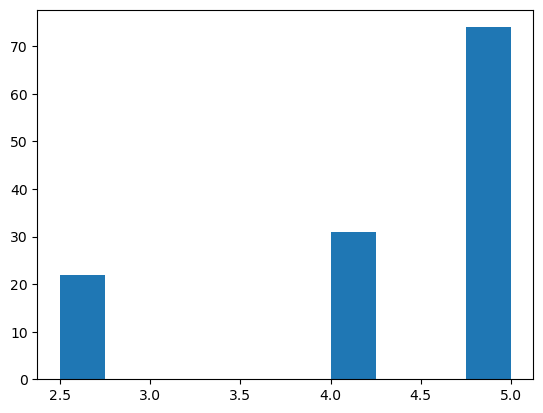

In [62]:
hehe.DECSN_factors_E_commutelength

(array([33.,  0.,  0.,  0.,  0.,  0., 40.,  0.,  0., 54.]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 10 artists>)

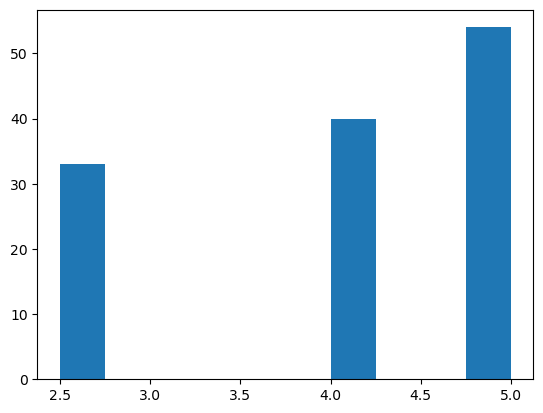

In [63]:
plt.hist(hehe.DECSN_factors_C_WrkLifeSep)

(array([31.,  0.,  0.,  0.,  0.,  0., 47.,  0.,  0., 51.]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 10 artists>)

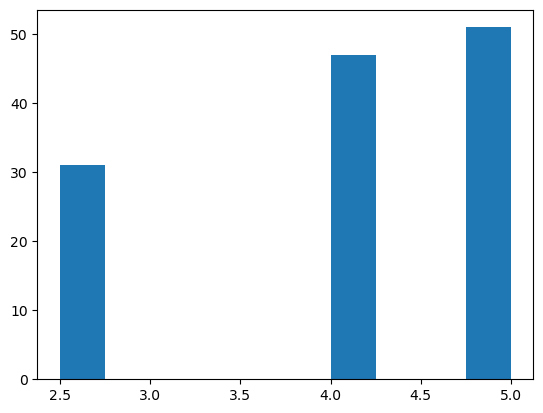

In [64]:
plt.hist(hehe.DECSN_factors_I_coworkerspresence)

(array([38.,  0.,  0.,  0.,  0.,  0., 36.,  0.,  0., 52.]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 10 artists>)

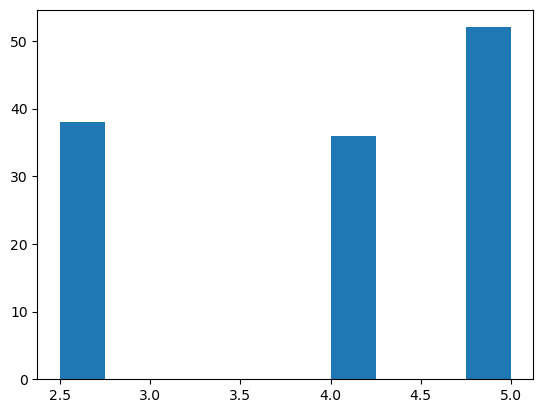

In [66]:
plt.hist(hehe.DECSN_factors_P_family)

(array([11.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0., 62.]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 10 artists>)

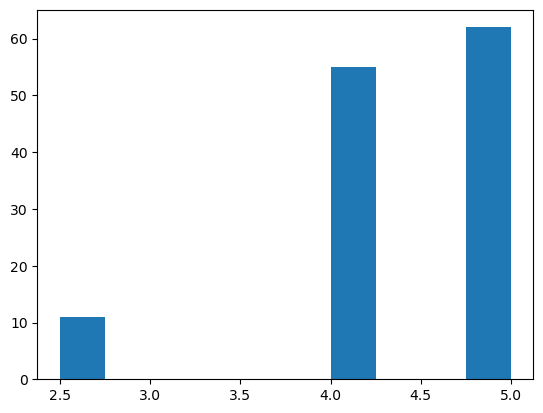

In [67]:
plt.hist(hehe.DECSN_factors_J_teampresence)

(array([14.,  0., 12.,  0.,  0., 28.,  0.,  0.,  0., 35.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

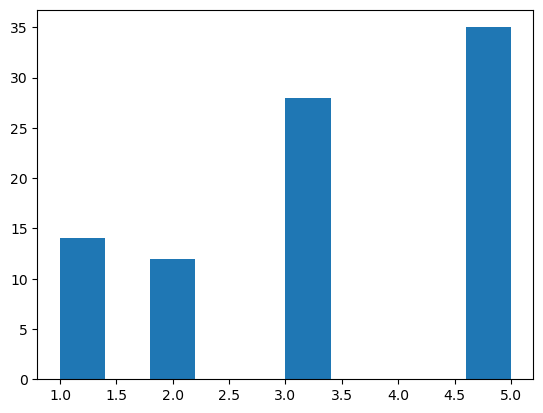

In [68]:
plt.hist(hehe.WP_Featr_office_E_control)

(array([ 9.,  0., 17.,  0.,  0., 40.,  0.,  0.,  0., 15.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

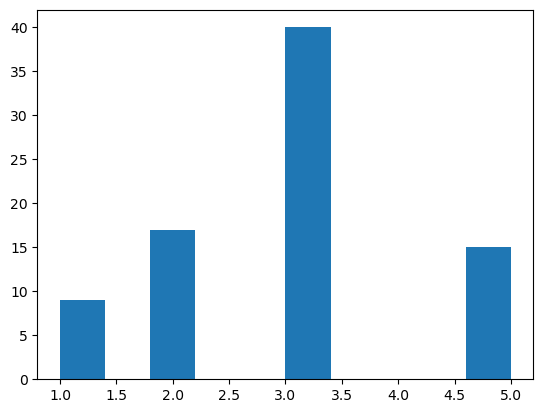

In [69]:
plt.hist(hehe.WP_Featr_office_I_oegculture)

(array([ 1.,  0.,  3.,  0.,  0., 31.,  0.,  0.,  0., 41.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

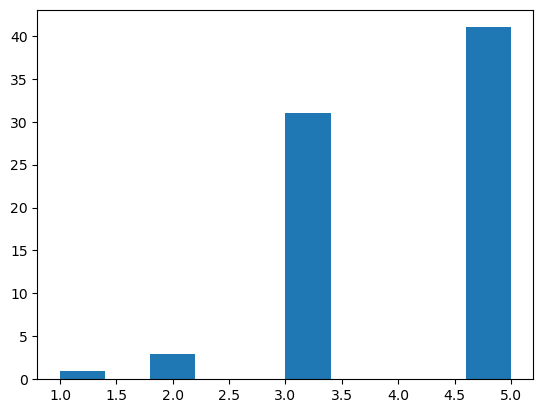

In [70]:
plt.hist(hehe.WP_Featr_office_J_knowledgeshare)

(array([ 3.,  0., 13.,  0.,  0., 33.,  0.,  0.,  0., 25.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

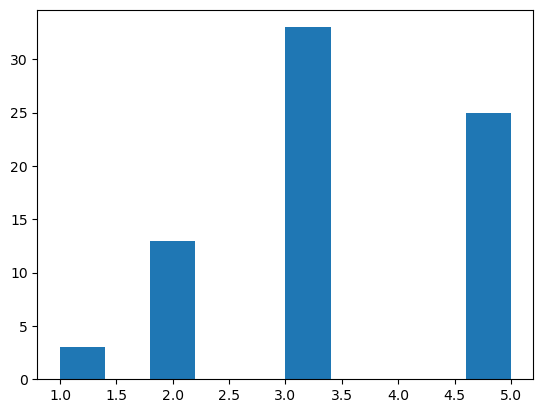

In [71]:
plt.hist(hehe.WP_Featr_office_C_pride)

(array([ 6.,  0.,  4.,  0.,  0., 28.,  0.,  0.,  0., 39.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

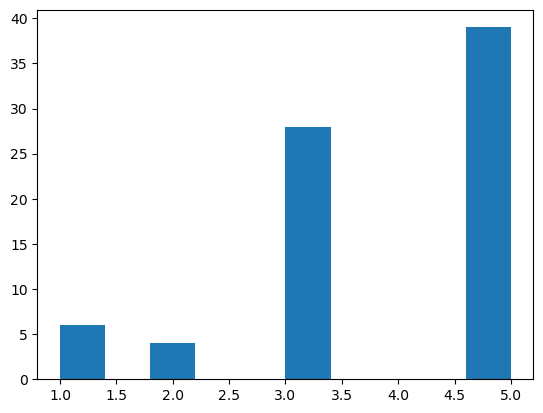

In [72]:
plt.hist(hehe.WP_Featr_office_F_wellbeing)

(array([12.,  0., 25.,  0.,  0., 48.,  0.,  0.,  0., 12.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

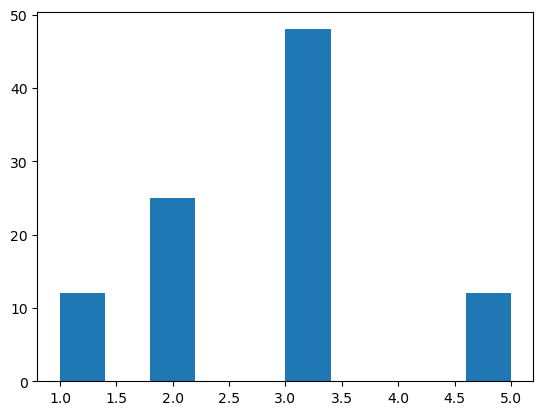

In [73]:
plt.hist(hehe.WP_Featr_office_D_expressme)

In [76]:
features = [
    "PREF_features_C_concentration",
    "PREF_features_J_collabspace",
    "PREF_features_M_lockers",
    "PREF_features_N_events",
    "PREF_features_O_food",
    "PREF_features_R_gym",
    "PREF_features_S_relax",
    "PREF_features_T_greenspace"
]

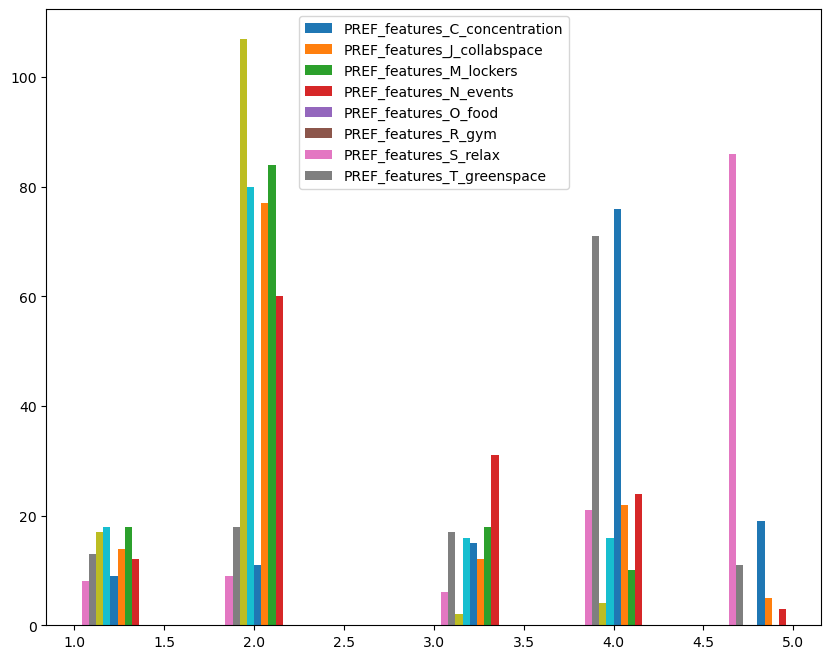

In [94]:
plt.figure(figsize=(10,8)) 
for feature in features:
    plt.hist(hehe[features])
    
plt.legend(features)

plt.show()

In [114]:
factors = [
    "DECSN_factors_B_healthwellness",
    "DECSN_factors_C_WrkLifeSep",
    "DECSN_factors_D_safety",
    "DECSN_factors_E_commutelength",
    "DECSN_factors_F_collabtools",
    "DECSN_factors_H_purpose",
    "DECSN_factors_I_coworkerspresence",
    "DECSN_factors_J_teampresence",
    "DECSN_factors_M_metorship",
    "DECSN_factors_N_neighorhood",
    "DECSN_factors_P_family",
    "DECSN_factors_Q_leadership"
] 

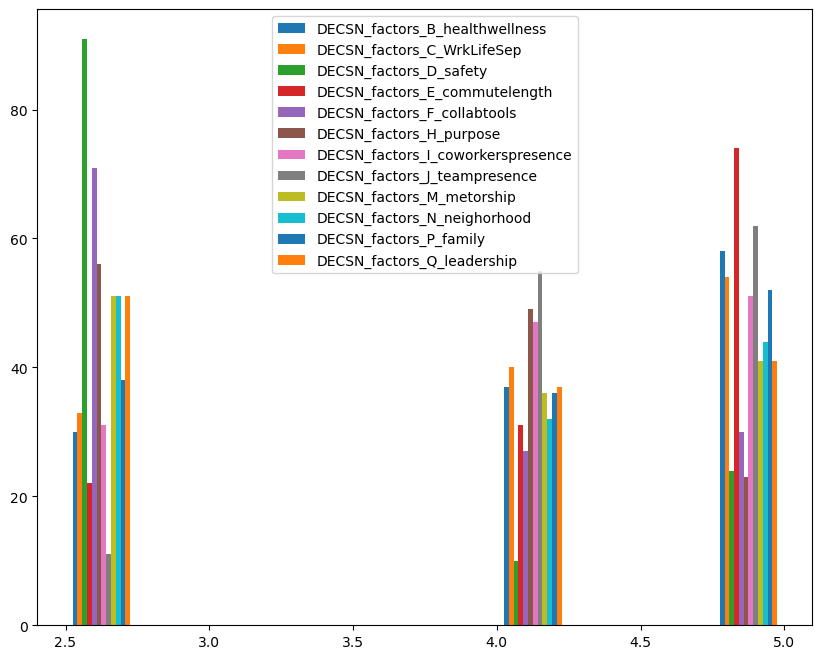

In [123]:
plt.figure(figsize=(10,8))
f = [] 
for factor in factors:
    f.append(hehe[factor]) 

plt.hist(f)
plt.legend(factors)
plt.show()

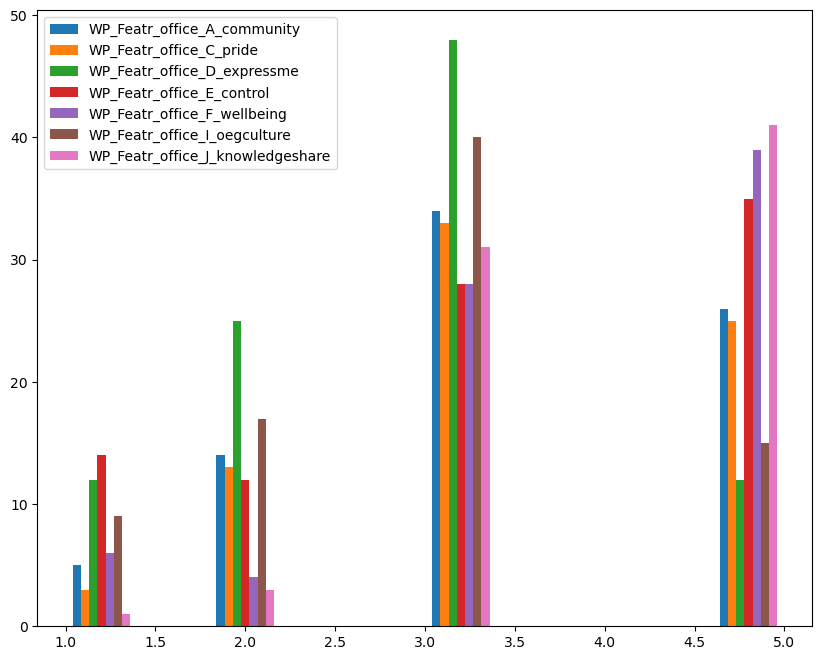

In [124]:
office_features = [
    "WP_Featr_office_A_community",
    "WP_Featr_office_C_pride",
    "WP_Featr_office_D_expressme",
    "WP_Featr_office_E_control",
    "WP_Featr_office_F_wellbeing",
    "WP_Featr_office_I_oegculture",
    "WP_Featr_office_J_knowledgeshare"
]
 
plt.figure(figsize=(10,8))
o = []
for office in office_features:
    o.append(hehe[office])
    
plt.hist(o)    
plt.legend(office_features)
plt.show()

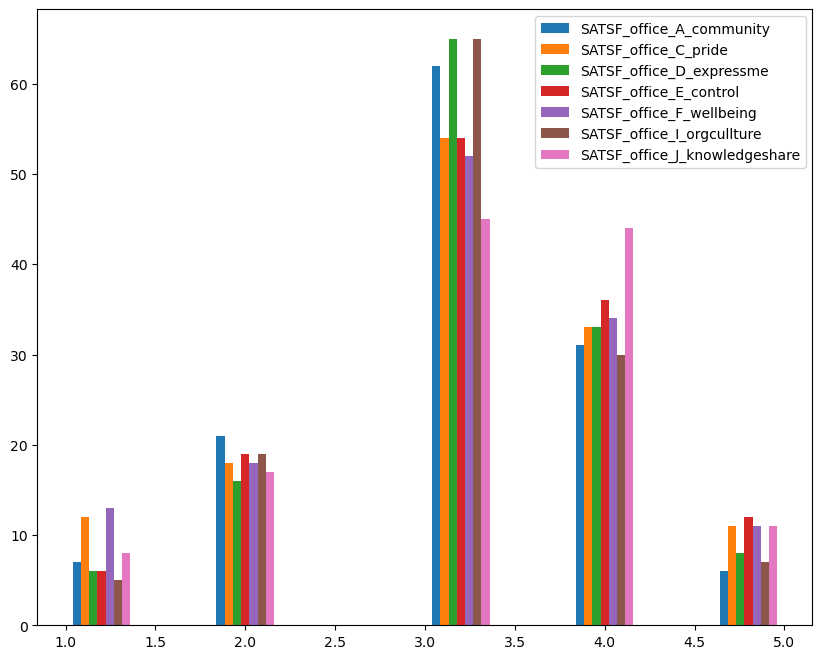

In [126]:
office_features = [
    "SATSF_office_A_community",
    "SATSF_office_C_pride",
    "SATSF_office_D_expressme",
    "SATSF_office_E_control",
    "SATSF_office_F_wellbeing",
    "SATSF_office_I_orgcullture",
    "SATSF_office_J_knowledgeshare"
] 

s = [] 

plt.figure(figsize=(10,8))
for oo in office_features:
    s.append(hehe[oo]) 
    
plt.hist(s)
plt.legend(office_features)
plt.show()